# Analyzing the Impact of Bitcoin Market Sentiment on Hyperliquid Trader Performance

---

**Introduction**

This project investigates how Bitcoin market sentiment (Fear & Greed Index) influences trader behavior and profitability on the Hyperliquid decentralized exchange.

We combine:
- Daily Bitcoin sentiment classifications
- Historical trade execution data from Hyperliquid

The objective is to:
- Align trader activity with emotional market regimes
- Quantify performance differences across sentiment states
- Identify behavioral and directional trading patterns
- Detect wallets that outperform during specific market emotions

This analysis mimics institutional behavioral finance research applied to crypto trading.

---

🚀 **PHASE 1 — Setup & Loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

*Load datasets*

We load both datasets:
- Fear & Greed daily sentiment data
- Hyperliquid historical trader execution data

In [3]:
fear = pd.read_csv(r"..\dataset\fear_greed_index.csv")
hist = pd.read_csv(r"..\dataset\historical_data.csv")

🕒 **PHASE 2 — Time Alignment**

To merge both datasets correctly:
- Convert timestamps into datetime
- Extract daily date from trade data
- Standardize time format across datasets

In [4]:
fear['date'] = pd.to_datetime(fear['date'])

hist['Timestamp'] = pd.to_datetime(hist['Timestamp'], unit='ms')
hist['date'] = hist['Timestamp'].dt.date
hist['date'] = pd.to_datetime(hist['date'])

📊 **PHASE 3 — Daily Trader Profit vs Sentiment**

We aggregate total daily trader Closed PnL and merge it with daily sentiment to study macro-level trader performance.

In [5]:
daily_pnl = hist.groupby('date')['Closed PnL'].sum().reset_index()

merged = daily_pnl.merge(
    fear[['date','classification','value']],
    on='date',
    how='left'
)
merged.head()

,date,Closed PnL,classification,value
0,2023-03-28,0.000000e+00,Greed,59.0
1,2023-11-14,1.555034e+02,Greed,69.0
2,2024-03-09,1.769655e+05,Extreme Greed,84.0
3,2024-07-03,1.587424e+05,Neutral,50.0
4,2024-10-27,3.189461e+06,Greed,74.0


In [6]:
summary = merged.groupby('classification')['Closed PnL'].agg(['mean','count'])
summary.sort_values('mean')

,mean,count
classification,,
Neutral,1.587424e+05,1
Extreme Greed,1.769655e+05,1
Greed,1.063206e+06,3
Fear,6.699925e+06,1


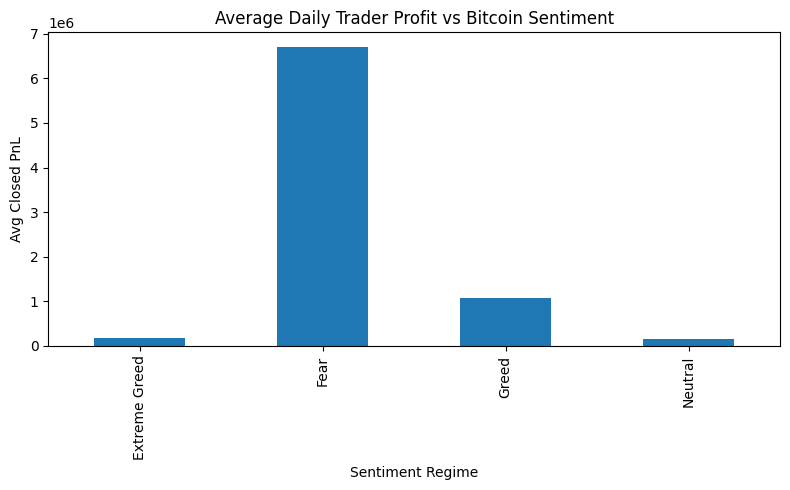

In [7]:
summary['mean'].plot(kind='bar', figsize=(8,5))
plt.title("Average Daily Trader Profit vs Bitcoin Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Sentiment Regime")
plt.tight_layout()
plt.show()

🔍 **PHASE 4 — Trade-Level Sentiment Mapping**

Now we map sentiment to each individual trade to analyze micro-level trader behavior.

In [8]:
trade_sentiment = hist.merge(
    fear[['date','classification','value']],
    on='date',
    how='left'
)

trade_sentiment.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed,74.0


📈 **PHASE 5 — Trade Profitability by Sentiment**

We evaluate which sentiment regimes produce profitable trades.

In [9]:
sentiment_trade_perf = trade_sentiment.groupby('classification')['Closed PnL'].agg(
    ['mean','sum','count']
).sort_values('mean')

sentiment_trade_perf

,mean,sum,count
classification,,,
Neutral,22.229713,1.587424e+05,7141
Extreme Greed,25.418772,1.769655e+05,6962
Fear,50.047622,6.699925e+06,133871
Greed,87.894859,3.189617e+06,36289


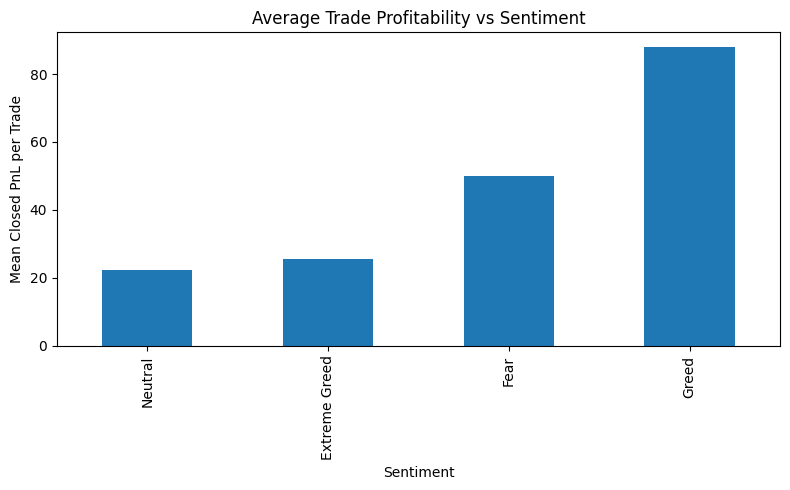

In [10]:
sentiment_trade_perf['mean'].plot(kind='bar', figsize=(8,5))
plt.title("Average Trade Profitability vs Sentiment")
plt.ylabel("Mean Closed PnL per Trade")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

⚖ **PHASE 6 — Risk Appetite (Trade Size) vs Sentiment**

We analyze whether traders take larger positions under Fear or Greed.

In [11]:
trade_sentiment['Size USD'] = pd.to_numeric(trade_sentiment['Size USD'], errors='coerce')

size_summary = trade_sentiment.groupby('classification')['Size USD'].agg(
    ['mean','sum','count']
).sort_values('mean')

size_summary

,mean,sum,count
classification,,,
Neutral,3058.848110,2.184323e+07,7141
Greed,3182.883845,1.155037e+08,36289
Fear,5259.977837,7.041585e+08,133871
Extreme Greed,5660.265764,3.940677e+07,6962


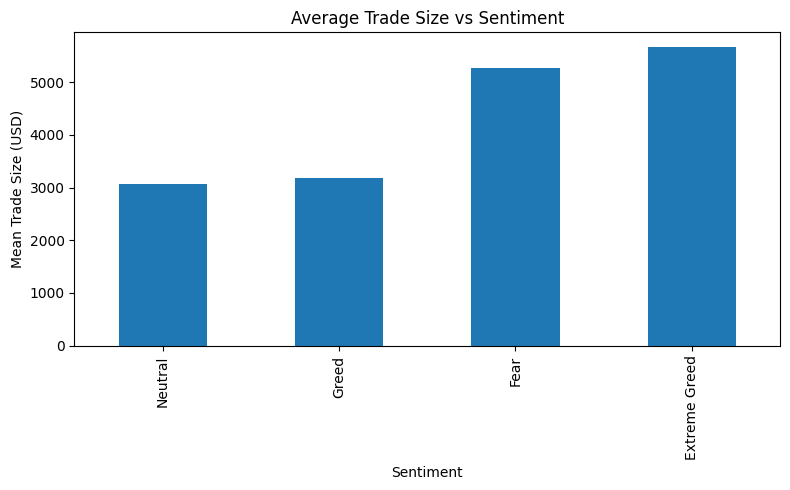

In [12]:
size_summary['mean'].plot(kind='bar', figsize=(8,5))
plt.title("Average Trade Size vs Sentiment")
plt.ylabel("Mean Trade Size (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

📊 **PHASE 7 — BUY vs SELL Performance per Sentiment**

We examine directional profitability under emotional market regimes.

In [13]:
side_perf = trade_sentiment.groupby(['classification','Side'])['Closed PnL'].agg(
    ['mean','sum','count']
).reset_index()

pivot_side = side_perf.pivot(index='classification', columns='Side', values='mean')
pivot_side

Side,BUY,SELL
classification,,
Extreme Greed,25.578564,25.268770
Fear,58.074630,42.222976
Greed,12.489506,143.617782
Neutral,15.646108,28.576120


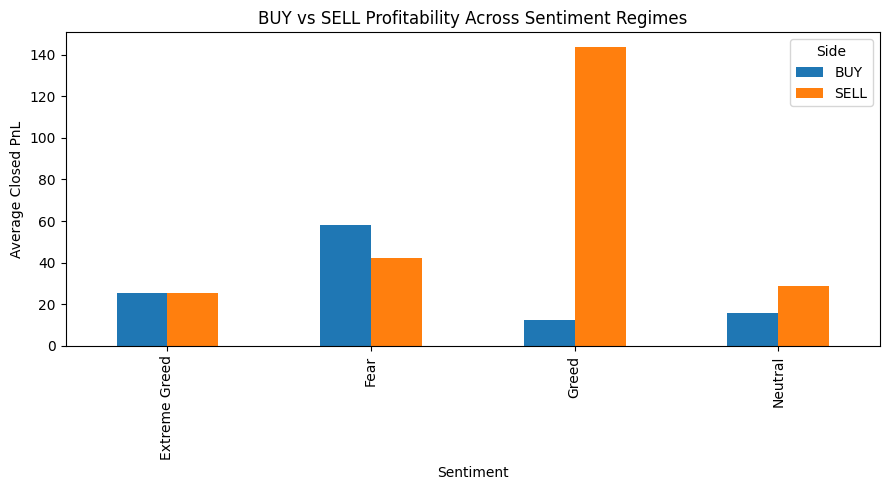

In [14]:
pivot_side.plot(kind='bar', figsize=(9,5))
plt.title("BUY vs SELL Profitability Across Sentiment Regimes")
plt.ylabel("Average Closed PnL")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

🏆 **PHASE 8 — Identify Top Wallets per Sentiment**

We detect smart-money wallets that consistently profit under certain emotional regimes.

In [15]:
wallet_perf = trade_sentiment.groupby(['classification','Account'])['Closed PnL'].sum().reset_index()

top_wallets = wallet_perf.sort_values(['classification','Closed PnL'], ascending=[True, False])

top_wallets.groupby('classification').head(5)

,classification,Account,Closed PnL
3,Extreme Greed,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,1.878421e+05
4,Extreme Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.606895e+03
1,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000e+00
0,Extreme Greed,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5.564016e+03
2,Extreme Greed,0x4f93fead39b70a1824f981a54d4e55b278e9f760,-7.919471e+03
5,Fear,0x083384f897ee0f19899168e3b1bec365f52a9012,1.927736e+06
34,Fear,0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401572e+05
16,Fear,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,6.133278e+05
32,Fear,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,5.538180e+05
18,Fear,0x513b8629fe877bb581bf244e326a047b249c4ff1,4.035016e+05


🧠 **PHASE 9 — Wallet Performance Stability**

We analyze wallet consistency across sentiment regimes to identify:
- Sentiment-specialized traders
- Stable profitable accounts
- High-risk / high-reward wallets

In [16]:
wallet_stats = trade_sentiment.groupby(['Account','classification'])['Closed PnL'].sum().reset_index()

wallet_pivot = wallet_stats.pivot(index='Account', columns='classification', values='Closed PnL').fillna(0)

wallet_pivot['total_profit'] = wallet_pivot.sum(axis=1)

wallet_pivot.sort_values('total_profit', ascending=False).head(10)

classification,Extreme Greed,Fear,Greed,Neutral,total_profit
Account,,,,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2606.894756,5.538180e+05,1.421911e+06,62586.181600,2.040922e+06
0x083384f897ee0f19899168e3b1bec365f52a9012,0.000000,1.927736e+06,-3.275059e+05,0.000000,1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864,0.000000,9.401572e+05,0.000000e+00,0.000000,9.401572e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,0.000000,1.269680e+05,6.842150e+05,0.000000,8.111830e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,0.000000,6.133278e+05,6.107617e+04,0.000000,6.744040e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,0.000000,9.826920e+04,3.275460e+05,0.000000,4.258152e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,1.105279e+05,1.604505e+05,145563.448374,4.165419e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,0.000000,4.035016e+05,0.000000e+00,0.000000,4.035016e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,0.000000,3.419454e+05,5.173758e+04,0.000000,3.936830e+05


🎯 **PHASE 10 — Sentiment-Specialist Wallet Detection**

Detect wallets that profit only under Fear or Greed.

In [17]:
wallet_pivot['fear_ratio'] = wallet_pivot.get('Fear',0) / wallet_pivot['total_profit']
wallet_pivot['greed_ratio'] = wallet_pivot.get('Greed',0) / wallet_pivot['total_profit']

specialists = wallet_pivot[(wallet_pivot['fear_ratio'] > 0.8) | (wallet_pivot['greed_ratio'] > 0.8)]

specialists.sort_values('total_profit', ascending=False).head(10)

classification,Extreme Greed,Fear,Greed,Neutral,total_profit,fear_ratio,greed_ratio
Account,,,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,0.0,1.927736e+06,-327505.900056,0.0,1.600230e+06,1.204662,-0.204662
0xbaaaf6571ab7d571043ff1e313a9609a10637864,0.0,9.401572e+05,0.000000,0.0,9.401572e+05,1.000000,0.000000
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,0.0,1.269680e+05,684215.002602,0.0,8.111830e+05,0.156522,0.843478
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,0.0,6.133278e+05,61076.167808,0.0,6.744040e+05,0.909437,0.090563
0x513b8629fe877bb581bf244e326a047b249c4ff1,0.0,4.035016e+05,0.000000,0.0,4.035016e+05,1.000000,0.000000
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,0.0,3.419454e+05,51737.579418,0.0,3.936830e+05,0.868581,0.131419
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,0.0,3.254420e+05,11671.680000,0.0,3.371137e+05,0.965378,0.034622
0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.0,1.834030e+05,16102.568590,0.0,1.995056e+05,0.919288,0.080712
0x8170715b3b381dffb7062c0298972d4727a0a63b,0.0,1.963038e+05,0.000000,0.0,1.963038e+05,1.000000,0.000000


📊 **PHASE 11 — Trade Frequency vs Sentiment**

We measure how active traders behave emotionally.

In [18]:
freq = trade_sentiment.groupby(['classification','Account']).size().reset_index(name='trade_count')

freq_summary = freq.groupby('classification')['trade_count'].mean()

freq_summary

classification
Extreme Greed    1392.400000
Fear             4183.468750
Greed            1251.344828
Neutral           892.625000
Name: trade_count, dtype: float64

💰 **PHASE 12 — High Profit Coins per Sentiment**

Identify which assets are exploited under Fear vs Greed.

In [19]:
coin_perf = trade_sentiment.groupby(['classification','Coin'])['Closed PnL'].sum().reset_index()

coin_perf.sort_values(['classification','Closed PnL'], ascending=[True, False]).groupby('classification').head(5)

,classification,Coin,Closed PnL
69,Extreme Greed,kBONK,3.625018e+04
15,Extreme Greed,DOGE,1.556143e+04
70,Extreme Greed,kPEPE,1.546845e+04
64,Extreme Greed,WLD,1.508400e+04
39,Extreme Greed,ONDO,1.399954e+04
146,Fear,HYPE,1.835061e+06
133,Fear,ETH,1.445276e+06
194,Fear,SOL,1.372565e+06
122,Fear,BTC,5.521138e+05
163,Fear,MELANIA,3.168006e+05


⚡ **PHASE 13 — Strategy Signals Extraction**

We derive behavioral rules from discovered patterns.

In [20]:
strategy = trade_sentiment.groupby(['classification','Side'])['Closed PnL'].mean().reset_index()

strategy

,classification,Side,Closed PnL
0,Extreme Greed,BUY,25.578564
1,Extreme Greed,SELL,25.268770
2,Fear,BUY,58.074630
3,Fear,SELL,42.222976
4,Greed,BUY,12.489506
5,Greed,SELL,143.617782
6,Neutral,BUY,15.646108
7,Neutral,SELL,28.576120


🧠 **PHASE 14 — Wallet Clustering by Behavior (Advanced Alpha)**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_data = wallet_pivot.drop(columns=['total_profit','fear_ratio','greed_ratio']).fillna(0)

scaled = StandardScaler().fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
wallet_pivot['cluster'] = kmeans.fit_predict(scaled)

wallet_pivot[['total_profit','cluster']].sort_values('total_profit', ascending=False).head(10)

classification,total_profit,cluster
Account,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.040922e+06,2
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,0
0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401572e+05,1
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,8.111830e+05,1
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,6.744040e+05,1
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,4.258152e+05,1
0x430f09841d65beb3f27765503d0f850b8bce7713,4.165419e+05,2
0x513b8629fe877bb581bf244e326a047b249c4ff1,4.035016e+05,1
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,3.936830e+05,1


🧠 **PHASE 15 — Create Trade Label (Profit / Loss)**

To build a predictive system, we first convert each trade into a binary outcome:
- 1 → Profitable trade (Closed PnL > 0)
- 0 → Loss-making trade

This transforms the problem into a classification task.

In [22]:
trade_sentiment['label'] = (trade_sentiment['Closed PnL'] > 0).astype(int)
trade_sentiment['label'].value_counts()

label
0    124355
1     86869
Name: count, dtype: int64

📊 **PHASE 16 — Feature Engineering**

We prepare model-ready numerical features from the dataset:

Features used:
- Sentiment Score (value)
- Trade Size (Size USD)
- Trade Side (BUY/SELL encoded)
- Coin traded (encoded)

Categorical features are converted using Label Encoding.

In [23]:
from sklearn.preprocessing import LabelEncoder

df = trade_sentiment.copy()

le_side = LabelEncoder()
le_coin = LabelEncoder()

df['side_enc'] = le_side.fit_transform(df['Side'])
df['coin_enc'] = le_coin.fit_transform(df['Coin'])

features = df[['value','Size USD','side_enc','coin_enc']]
target = df['label']

In [24]:
# Remove rows with missing values in selected features
df_clean = df[['value','Size USD','side_enc','coin_enc','label']].dropna()

features = df_clean[['value','Size USD','side_enc','coin_enc']]
target = df_clean['label']

print("Clean dataset shape:", df_clean.shape)


Clean dataset shape: (184263, 5)


✂ **PHASE 17 — Train/Test Split**

We split the dataset into training and testing subsets:
- 80% → Training (model learning)
- 20% → Testing (performance evaluation)

This ensures unbiased validation.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

🤖 **PHASE 18 — Model Training**

We train a Random Forest classifier to predict trade profitability based on sentiment and trade behavior.

Random Forest is chosen because:
- Works well on structured financial data
- Handles nonlinear patterns
- Robust to noise

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.7744552682278241
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     21338
           1       0.73      0.73      0.73     15515

    accuracy                           0.77     36853
   macro avg       0.77      0.77      0.77     36853
weighted avg       0.77      0.77      0.77     36853



📈 **PHASE 19 — Feature Importance Analysis**

To understand which factors influence profitability most, we extract feature importance from the trained model.

This reveals:
- Whether sentiment impacts trade success
- The role of trade size
- Behavioral significance of side & asset selection

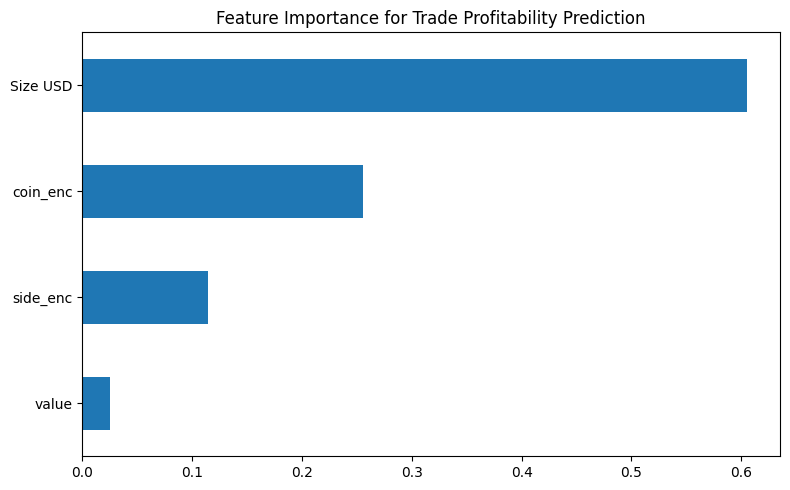

In [27]:
importances = pd.Series(model.feature_importances_, index=features.columns)

importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance for Trade Profitability Prediction")
plt.tight_layout()
plt.show()